# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [2]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [3]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [4]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


def least_squares_method_w(X, y):
  return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

def least_squares_method_b(X, y, w):
  return np.mean(y) - w * np.mean(X)

def MSE(y, predicted):
  return np.mean(np.power((y - predicted), 2))

def MAE(y, predicted):
  return np.mean(np.absolute(y - predicted))


model = LinearRegression()
model.fit(X_train, y_train)
w = model.coef_
b = model.intercept_
wlsm = least_squares_method_w(X_train, y_train)
blsm = least_squares_method_b(X_train, y_train, wlsm[0])
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
trainMSE = mean_squared_error(y_train, y_train_predicted)
testMSE = mean_squared_error(y_test, y_test_predicted)
trainMAE = mean_absolute_error(y_train, y_train_predicted)
testMAE = mean_absolute_error(y_test, y_test_predicted)
print(f'sklearn:\nw = {w[0]}, b = {b}\ntrain: MSE = {trainMSE},' + 
      f'MAE = {trainMAE}\ntest: MSE = {testMSE}, MAE = {testMAE}')
print(f'своё:\nw = {wlsm[0]}, b = {blsm}\n' + 
      f'train: MSE = {MSE(y_train, y_train_predicted)}, ' + 
      f'MAE = {MAE(y_train, y_train_predicted)}\n' + 
      f'test: MSE = {MSE(y_test, y_test_predicted)}, ' +
      f'MAE = {MAE(y_test, y_test_predicted)}')

sklearn:
w = 10.340822569660972, b = -4.814564331753658
train: MSE = 82.85791913239474,MAE = 7.164529517704708
test: MSE = 101.10639891268538, MAE = 8.010057352304823
своё:
w = 10.369423941928819, b = -4.8131198180027575
train: MSE = 82.85791913239474, MAE = 7.164529517704708
test: MSE = 101.10639891268538, MAE = 8.010057352304823


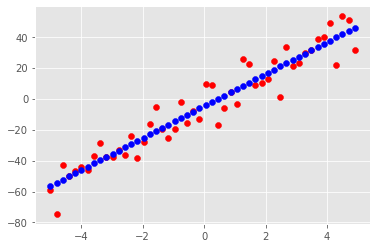

In [5]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_train, y_train_predicted, color = 'blue')
plt.show()

**Вывод. 
Значения из sklearn немного отличаются от значений, полученных путём реализации MSE и MAE**

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [6]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [7]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE
X_train = data["x_train"].reshape(-1, 1)
y_train = data["y_train"].reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
w = model.coef_
b = model.intercept_
wlsm = least_squares_method_w(X_train, y_train)[0][0]
blsm = least_squares_method_b(X_train, y_train, wlsm)
y_train_predicted = model.predict(X_train)
print(f'sklearn: w = {w[0][0]}, b = {b[0]}\nLSM: w = {wlsm}, b = {blsm}')
print(f'Train MSE: {mean_squared_error(y_train, y_train_predicted)}, ' +
      f'Train MAE: {mean_absolute_error(y_train, y_train_predicted)}')

sklearn: w = -0.2582965498530032, b = 1.7998029856503166
LSM: w = 0.16727419584006048, b = 0.4870403767798622
Train MSE: 0.3130414255468112, Train MAE: 0.46441011048201736


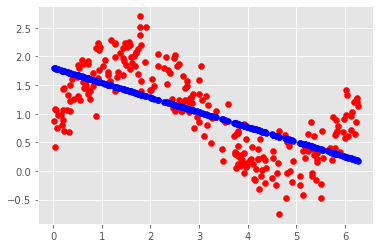

In [8]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_train, y_train_predicted, color = 'blue')
plt.show()

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

**ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ**

## Задание 3.3

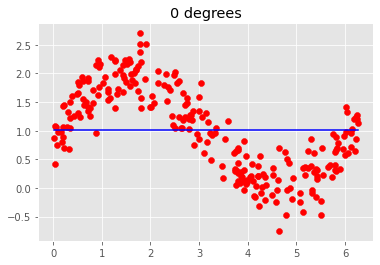

MSE: 0.5485706721027935
MAE: 0.633328600718301


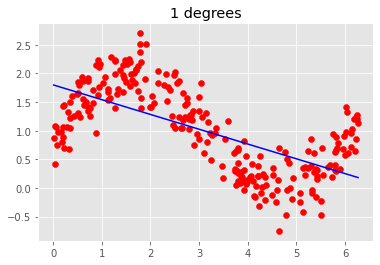

MSE: 0.3130414255468112
MAE: 0.46441011048201736


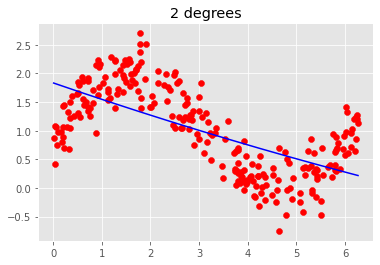

MSE: 0.3127490352785031
MAE: 0.4640843681813081


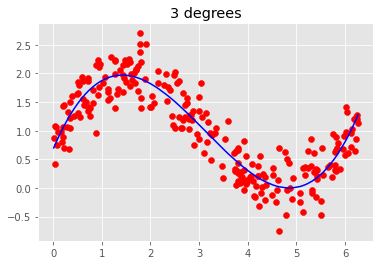

MSE: 0.09009835175552168
MAE: 0.24728999029405133


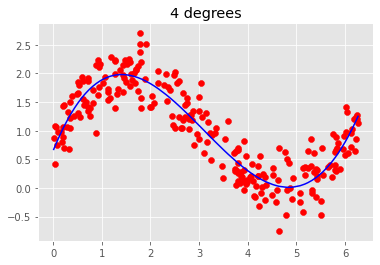

MSE: 0.08999592795686376
MAE: 0.2474697467820909


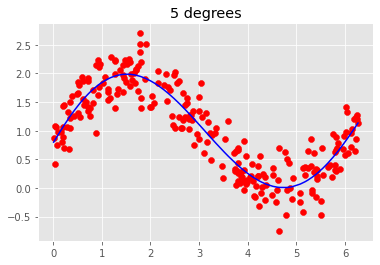

MSE: 0.08800609087519384
MAE: 0.24332078023876902


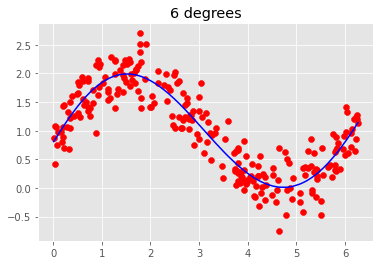

MSE: 0.08799508101512057
MAE: 0.2432772935656336


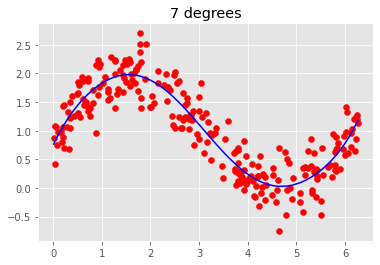

MSE: 0.08777129526829289
MAE: 0.24283994998960765


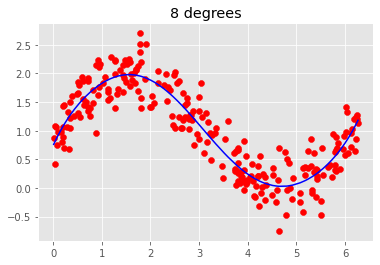

MSE: 0.08776863860834487
MAE: 0.24288913464434744


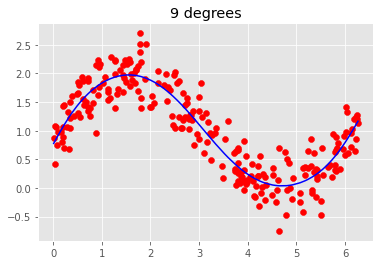

MSE: 0.08773811148584756
MAE: 0.24269528695643744


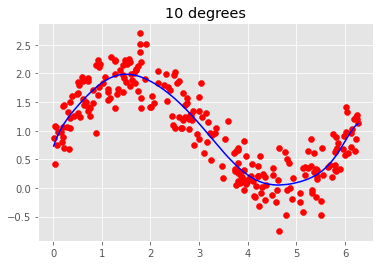

MSE: 0.08751685606160964
MAE: 0.24260622137977253


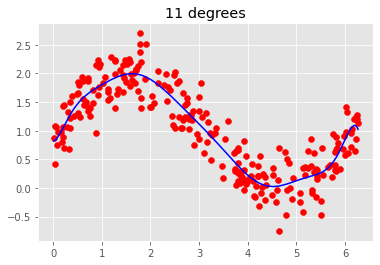

MSE: 0.0866851498472749
MAE: 0.24131140633134077


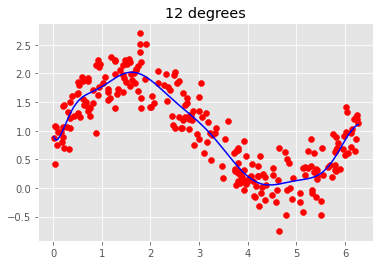

MSE: 0.08605237060760507
MAE: 0.2397681363416202


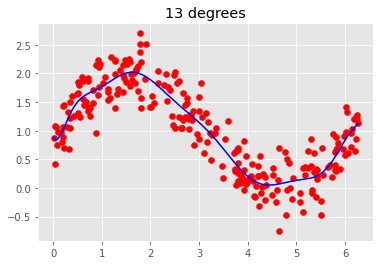

MSE: 0.08604565541124216
MAE: 0.23961342501101068


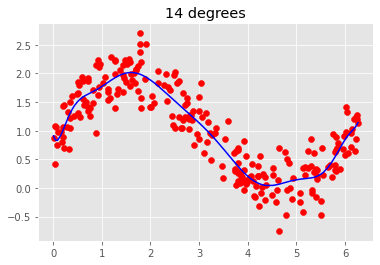

MSE: 0.08599604897860434
MAE: 0.239668535086705


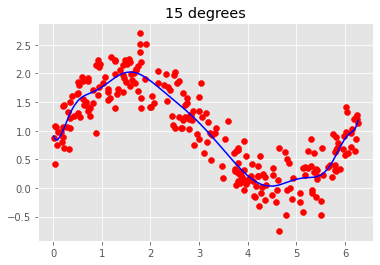

MSE: 0.08580612910197642
MAE: 0.2399256315807314


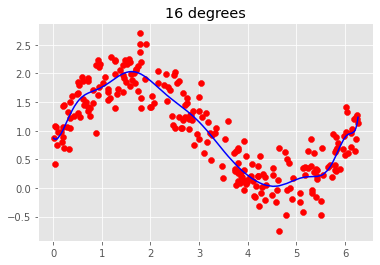

MSE: 0.08560961370839028
MAE: 0.2397833015221978


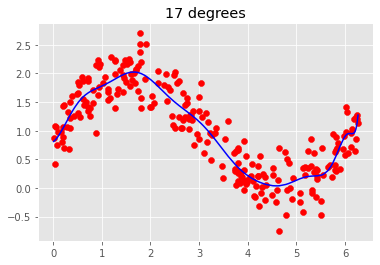

MSE: 0.08567647629527557
MAE: 0.23947158254215833


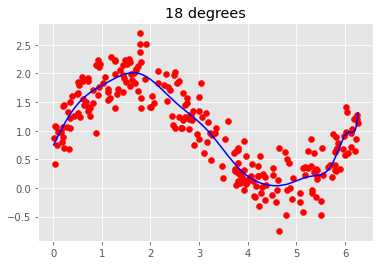

MSE: 0.08591747924018903
MAE: 0.23977644646982593


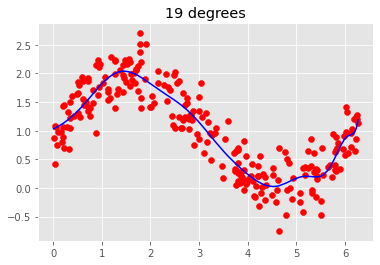

MSE: 0.08939525523927044
MAE: 0.2437154651771899


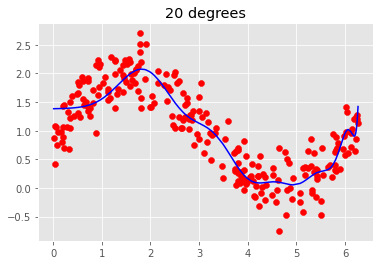

MSE: 0.1048350477383744
MAE: 0.2600022268589313


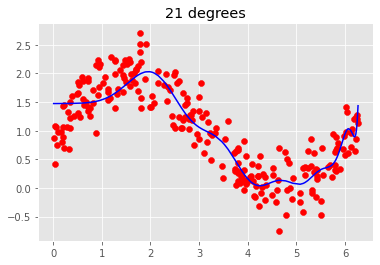

MSE: 0.11405103926848571
MAE: 0.27039298053193944


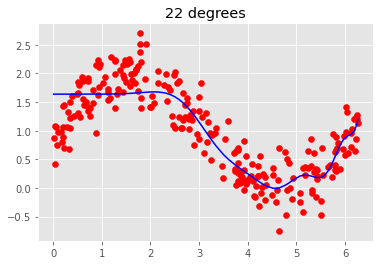

MSE: 0.1337362710373935
MAE: 0.2911112175650783


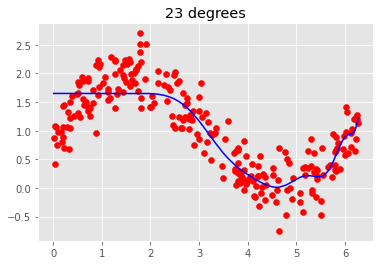

MSE: 0.1345607402911238
MAE: 0.29099481536124583


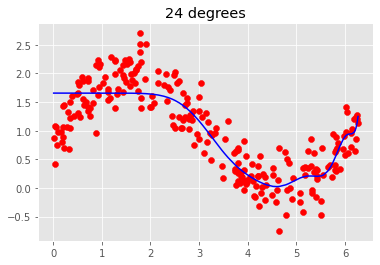

MSE: 0.1347334304030224
MAE: 0.29079330754199445


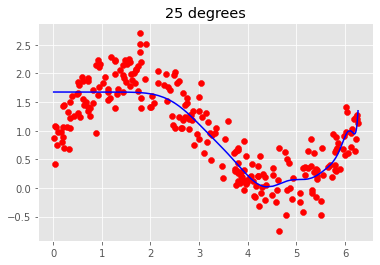

MSE: 0.1358988443245251
MAE: 0.2928337822182253


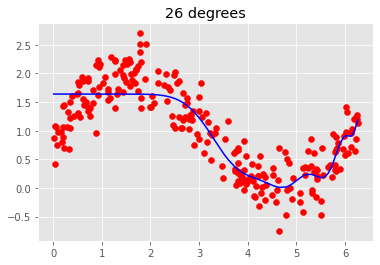

MSE: 0.1356267747704327
MAE: 0.29066970305106793


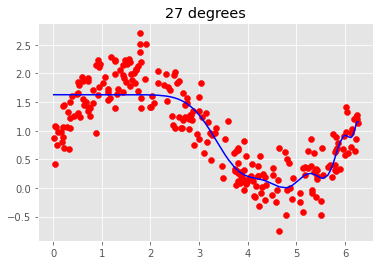

MSE: 0.1368669170780501
MAE: 0.29139063743009935


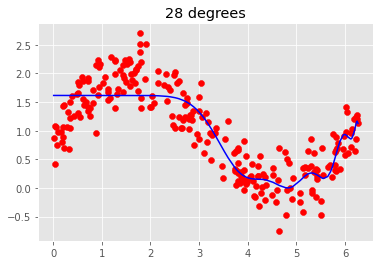

MSE: 0.1387315745617042
MAE: 0.29328974668692953


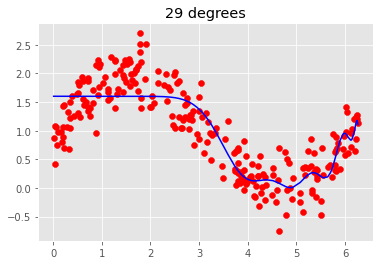

MSE: 0.14119551983230774
MAE: 0.29670372015598323


In [9]:
from sklearn.preprocessing import PolynomialFeatures

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему? НАИМЕНЬШАЯ МЕТРИКА
for i in range(30):
  poly = PolynomialFeatures(degree = i)
  X_poly = poly.fit_transform(X_train)
  model = LinearRegression()
  model.fit(X_poly, y_train)
  plt.title(f'{i} degrees')
  y_train_predicted = model.predict(X_poly)
  plt.scatter(X_train, y_train, color = 'red')
  plt.plot(X_train, y_train_predicted, color = 'blue')
  plt.show()
  print(f'MSE: {mean_squared_error(y_train, y_train_predicted)}')
  print(f'MAE: {mean_absolute_error(y_train, y_train_predicted)}')

**Как мы можем заметить исследуя эти прекрасные графики ошибки минимальны и линия максимально похожа на синусоиду при 5 градусках. Следовательно,  полином 5 степени подходит лучше всех.**

In [10]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = np.linspace(-50 , 50, int(n_points / 3))

  X_train = X[0::2].reshape(-1, 3)
  y_train = y[0::2] #+ np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 3)
  y_test = y[1::2] #+ np.random.randn(int(n_points/2)) * 10


  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test


X, X_train, y_train, X_test, y_test = generate_data(1500)
def least_squares_method_w(X, y):
  return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

def least_squares_method_b(X, y, w):
  return np.mean(y) - w * np.mean(X)

def MSE(y, predicted):
  return np.mean(np.power((y - predicted), 2))

def MAE(y, predicted):
  return np.mean(np.absolute(y - predicted))


model = LinearRegression()
model.fit(X_train, y_train)
w = model.coef_
b = model.intercept_
wlsm = least_squares_method_w(X_train, y_train)
blsm = least_squares_method_b(X_train, y_train, wlsm[0])
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
trainMSE = mean_squared_error(y_train, y_train_predicted)
testMSE = mean_squared_error(y_test, y_test_predicted)
trainMAE = mean_absolute_error(y_train, y_train_predicted)
testMAE = mean_absolute_error(y_test, y_test_predicted)
print(f'sklearn:\nw = {w[0]}, b = {b}\ntrain: MSE = {trainMSE},' + 
      f'MAE = {trainMAE}\ntest: MSE = {testMSE}, MAE = {testMAE}')
print(f'своё:\nw = {wlsm[0]}, b = {blsm}\n' + 
      f'train: MSE = {MSE(y_train, y_train_predicted)}, ' + 
      f'MAE = {MAE(y_train, y_train_predicted)}\n' + 
      f'test: MSE = {MSE(y_test, y_test_predicted)}, ' +
      f'MAE = {MAE(y_test, y_test_predicted)}')

Generated 250 train samples and 250 test samples
sklearn:
w = 3.3377866844800703, b = -0.06680026720107442
train: MSE = 8.366786411410765e-29,MAE = 8.07759414911402e-15
test: MSE = 0.017849102792538853, MAE = 0.13360053440214548
своё:
w = 3.92266201351822, b = -0.08711613791461488
train: MSE = 8.366786411410765e-29, MAE = 8.07759414911402e-15
test: MSE = 0.017849102792538853, MAE = 0.13360053440214548


# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
house_data = load_boston()

## Задание 3.4

In [13]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

trainMSE = mean_squared_error(y_train, y_train_predicted)
testMSE = mean_squared_error(y_test, y_test_predicted)
trainMAE = mean_absolute_error(y_train, y_train_predicted)
testMAE = mean_absolute_error(y_test, y_test_predicted)
print(f'train:\n MSE = {trainMSE}, MAE = {trainMAE}')
print(f'test:\n MSE = {testMSE}, MAE = {testMAE}')

train:
 MSE = 22.2932040043331, MAE = 3.3442376206294697
test:
 MSE = 22.055395314346026, MAE = 3.5182295525496423


In [14]:
top7 = pd.DataFrame(np.absolute(model.coef_), index=X.columns).sort_values(
    0, ascending=False).head(7)
X = X[top7.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
X_train = StandardScaler().fit_transform(X_train)#
X_test = StandardScaler().fit_transform(X_test)#
model = LinearRegression()
model.fit(X_train, y_train)
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
trainMSE = mean_squared_error(y_train, y_train_predicted)
testMSE = mean_squared_error(y_test, y_test_predicted)
trainMAE = mean_absolute_error(y_train, y_train_predicted)
testMAE = mean_absolute_error(y_test, y_test_predicted)
print(f'train:\n MSE = {trainMSE}, MAE = {trainMAE}')
print(f'test:\n MSE = {testMSE}, MAE = {testMAE}')

train:
 MSE = 24.656227054788932, MAE = 3.5368305508064304
test:
 MSE = 22.69513521656474, MAE = 3.497072323387197


**На тестовых данных в усечённом наборе метрика гораздо хуже.**
